# Load Dataset

## loading spectrum

In [1]:
import numpy as np

signals = np.loadtxt('data/spectrum.csv', delimiter=';')
signals.shape

(6032, 12103)

## loading labels and features

,esp_id,label,"median(8,13)","rms(98,102)","median(98,102)",peak1x,peak2x,a,b
id,,,,,,,,,
0,7,Normal,0.002170,0.073935,0.000745,0.04894,0.01040,-0.000253,-6.485689
1,0,Normal,0.000290,0.266436,0.002295,0.15950,0.02152,-0.000546,-7.630209
2,4,Normal,0.042025,0.171981,0.004265,0.11314,0.02472,-0.003483,-2.293972
3,5,Normal,0.000915,0.060911,0.000310,0.03801,0.00534,-0.000960,-6.725640
4,7,Normal,0.001235,0.105685,0.001320,0.06891,0.00479,-0.000497,-6.407991


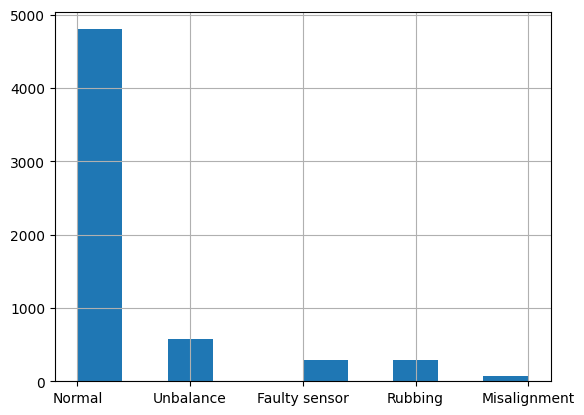

In [2]:
import pandas as pd

features = pd.read_csv('data/features.csv',sep=';', index_col='id')
labels = features['label']
esp_id = features['esp_id']
labels.hist();
features.head()

# Cross-validation on models applied to ICTAI2016 features

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from PredefinedKFold import PredefinedKFold

ICTAI2016_features = ['a', 'b', 'real_rotation_hz', 'peak1x', 'peak2x', 'rms(freq-1,freq+1)',
                      'median(freq-1,freq+1)', 'median(3,5)']

X = features[ICTAI2016_features]

rf = RandomForestClassifier(n_estimators=100, max_features=5)

## cross-validation using ESP group

In [4]:
sampler = PredefinedKFold(n_rounds=1) # run 1 round only.
scores = cross_validate(rf, X, labels, groups=esp_id, scoring='f1_macro', cv=sampler)
scores['test_score']

array([0.69874913, 0.44767917, 0.65999974, 0.78918054])

## cross-validation using StratifiedKFold

In [5]:
sampler = StratifiedKFold(n_splits=4, shuffle=True) # run 1 round only.
scores = cross_validate(rf, X, labels, groups=esp_id, scoring='f1_macro', cv=sampler)
scores['test_score']

array([0.8839406 , 0.86804548, 0.87580565, 0.90267981])